In [61]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [5]:
df = pd.read_csv('csv/auto-mpg.csv')

# 전체 데이터의 내용을 일부분을 출력
# DF.head(n = 5)  : 데이터프레임의 앞부분을 조회, n(정수)를 생략하면 5행
#                   데이터의 전체적인 모양, 필드의 구성 확인
# DF.tail(n = 5)  : 데이터프레임의 뒷부분을 조회, n(정수)를 생략하면 5행
#                   가장 마지막에 추가된 데이터들
df.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
# 전체 데이터의 수량(크기)
# DF.shape   : 데이터프레임의 행(데이터 수)과 열(속성)
#              데이터의 수량과 각 데이터들을 몇 개의 특징(속성)으로 구분해서 저장
df.shape

(398, 9)

In [7]:
# Python의 기본 자료형과 Pandas의 자료형 비교
diff = pd.DataFrame([['int', 'int64'],
                     ['float', 'float64'],
                     ['str', 'object']],
                     columns = ['python', 'pandas'],
                     index = ['정수', '실수', '문자열'])
diff

,python,pandas
정수,int,int64
실수,float,float64
문자열,str,object


In [8]:
# DF.info()  : 전체 컬럼별 이름과 컬럼에 저장된 데이터 수량과 데이터타입
#              부족한 데이터수량을 갖는 컬럼이 있는가?
#              저장된 데이터타입에 문제가 있는가?
#              info() 메소드는 반환값이 없는 출력만 출력만 목적으로 하는 함수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# info() 메소드 말고, 데이터 수량[count()]이나 데이터타입[dtypes]을 반환하는 함수
# 반환값을 이용하여 코드에 활용하고 싶을 때는 info() 대신 count()나 dtypes를 사용
count = df.count()
dtypes = df.dtypes
print(count)
print()
print(dtypes)

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [10]:
# 기술 통계량: 평균(mean), 최소(min), 25%, 중간(median), 75%, 최대(max), 표준편차(std)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# DF.mean()  : 평균값
df[['mpg', 'cylinders', 'weight', 'acceleration']].mean()

mpg               23.514573
cylinders          5.454774
weight          2970.424623
acceleration      15.568090
dtype: float64

In [12]:
# DF.min()    : 최소값
# DF.median() : 중간값
# DF.max()    : 최대값
columns = ['mpg', 'cylinders', 'weight', 'acceleration']
min = df[columns].min()
median = df[columns].median()
max = df[columns].max()
#print(min)
#print()
#print(median)
#print()
#print(max)
pd.DataFrame({'min':min, 'median':median, 'max':max})

,min,median,max
mpg,9.0,23.0,46.6
cylinders,3.0,4.0,8.0
weight,1613.0,2803.5,5140.0
acceleration,8.0,15.5,24.8


In [13]:
print(df['mpg'].mean())
print()
print(df[['mpg', 'acceleration']].mean())

23.514572864321607

mpg             23.514573
acceleration    15.568090
dtype: float64


In [14]:
print(df['mpg'].median())
print()
print(df[['mpg', 'acceleration']].median())

23.0

mpg             23.0
acceleration    15.5
dtype: float64


In [15]:
# DF.corr() : 상관계수 (0 ~ 1.0, -1.0 ~ 1.0) 사이의 값을 출력
df[['mpg', 'displacement', 'weight', 'acceleration']].corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.804203,-0.831741,0.420289
displacement,-0.804203,1.000000,0.932824,-0.543684
weight,-0.831741,0.932824,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.417457,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

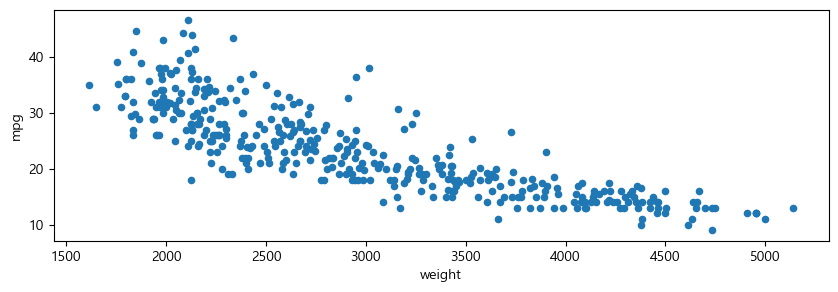

In [16]:
df[['mpg', 'weight']].plot(x = 'weight', y = 'mpg', kind = 'scatter', figsize = (10, 3))

In [17]:
# Series.plot(kind = '그래프종류')
# DataFrame.plot(kind = '그래프종류')

In [18]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[0, 3]]
df2 = df2.drop('발전 전력별', axis = 'columns')
df2 = df2.set_index('남북한별')
df2.index = ['north', 'south']
df2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


In [19]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df['남북한별'] = df['남북한별'].ffill()
df2 = df.set_index(['남북한별', '발전 전력별'])
df2 = df2.loc[[('북한', '합계'), ('남한', '합계')]]
df2.index = ['north', 'south']
for year in df2.columns:
    df2[year] = df2[year].map(int)
df2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


<Axes: >

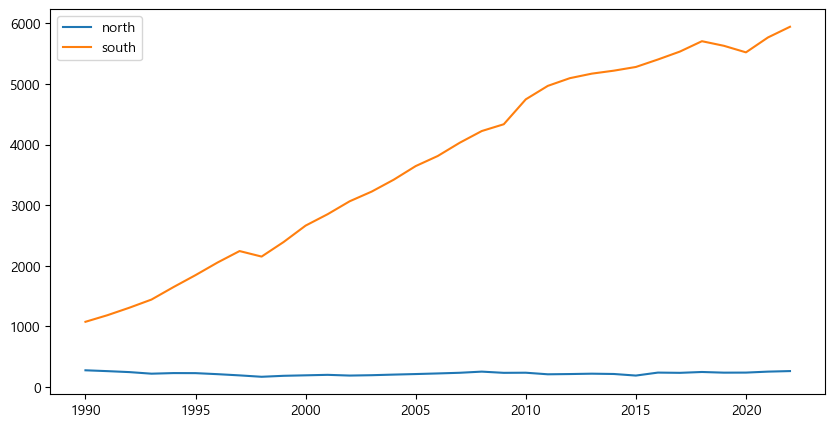

In [20]:
# DF.plot()      : 기본 선(line)그래프가 그려지고, index축의 데이터가 X축에 대입되고,
#                  columns축의 데이터가 범례(legend)에 대입된다.
#                  수량에 따라 Y축의 높이가 나타난다.
#                  figsize = (행크기, 열크기) 그래프 모형의 크기
df2_T = df2.transpose()
df2_T.plot(figsize = (10, 5))

<Axes: >

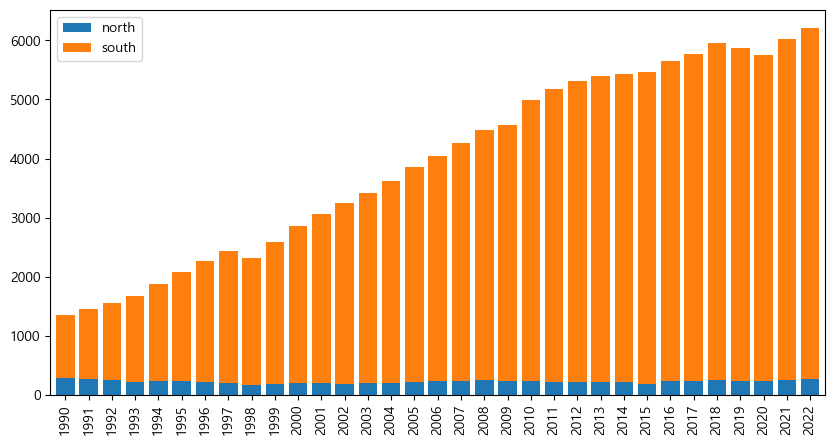

In [21]:
# DF.plot(kind = 'bar')  : 수직막대(bar) 그래프, width = 굵기, stacked = False/True
df2_T.plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10, 5))

<Axes: >

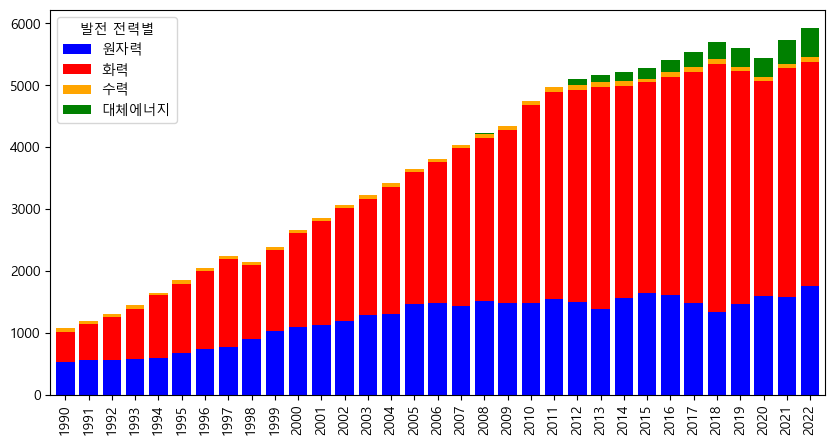

In [30]:

df3 = df.set_index(['남북한별', '발전 전력별'])
df3 = df3.loc['남한']
df3 = df3.replace({'-':0})
df3_T = df3.T
df3_T = df3_T[['원자력','화력','수력','대체에너지']]
df3_T.plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10,5),
           color = ['blue','red','orange','green'])


<Axes: ylabel='Frequency'>

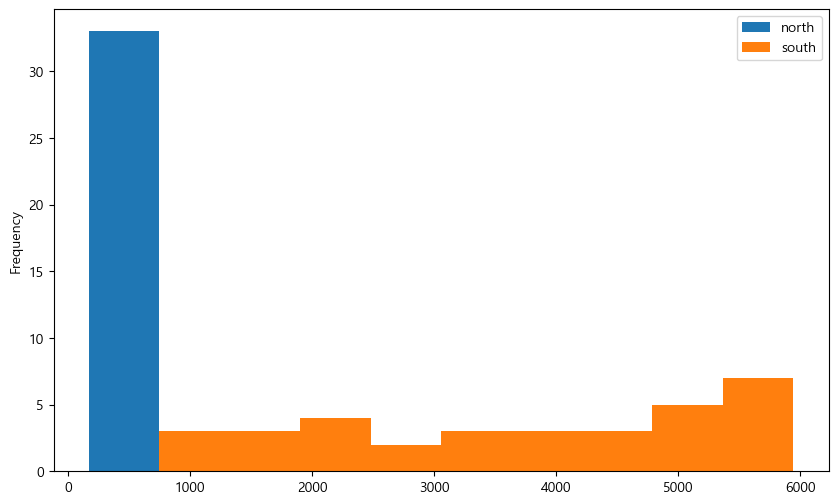

In [34]:
df2_T.plot(kind = 'hist',figsize = (10,6))

In [35]:
car = pd.read_csv('csv/auto-mpg.csv')

In [40]:
columns = ['mpg','cylinders','weight','acceleration','model year','origin']
car2 = car[columns]
car2
car2.corr()

,mpg,cylinders,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.896017,-0.505419,-0.348746,-0.562543
weight,-0.831741,0.896017,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.581024,0.205873,0.180662,1.000000


<Axes: xlabel='origin', ylabel='mpg'>

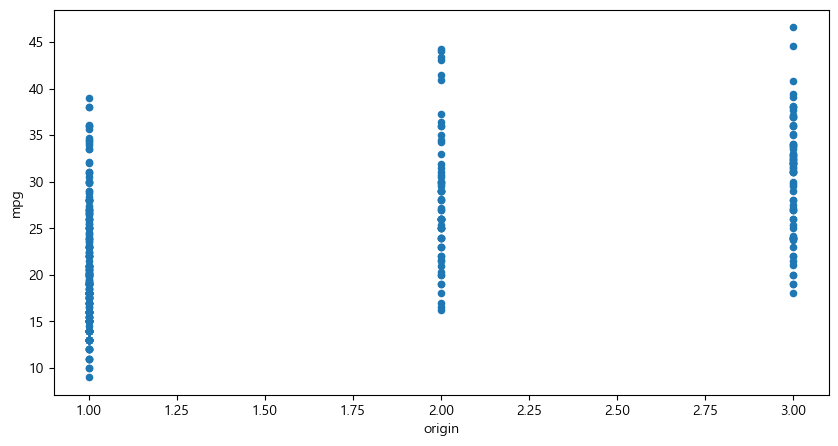

In [41]:
car2.plot(kind = 'scatter',x = 'origin',y='mpg',figsize = (10,5))

<Axes: xlabel='weight', ylabel='mpg'>

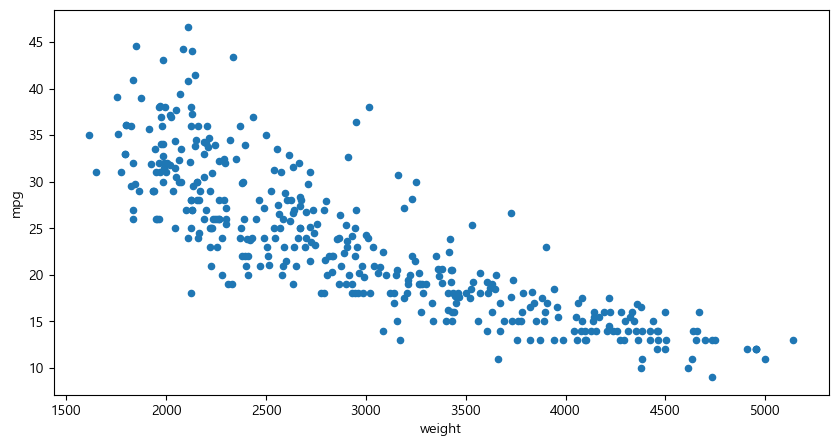

In [42]:
car2.plot(kind = 'scatter',x = 'weight',y='mpg',figsize = (10,5))

<Axes: >

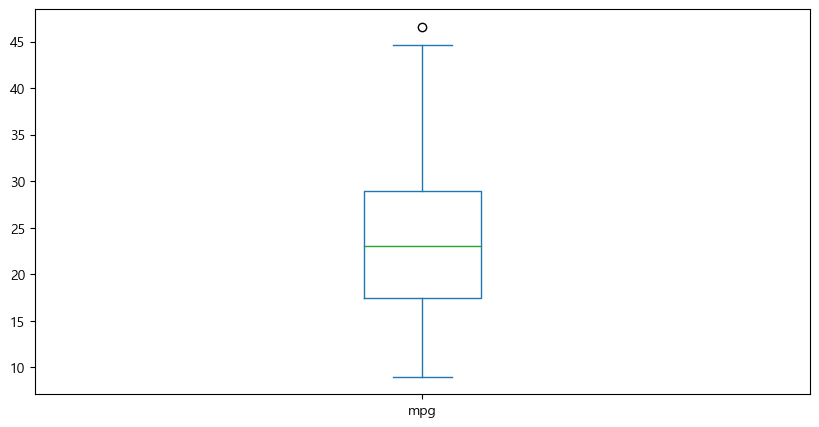

In [43]:
car2['mpg'].plot(kind = 'box',figsize = (10,5)) # 밖에 있는것은 outlier

<Axes: >

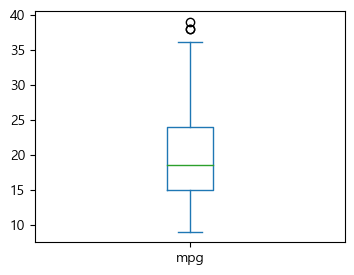

In [50]:
mask = car2['origin'] == 1 # -> masking 처리한다고 함
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))

<Axes: >

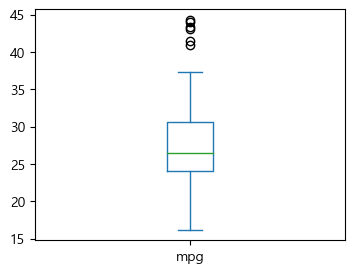

In [51]:
mask = car2['origin'] == 2 # -> masking 처리한다고 함
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))

<Axes: >

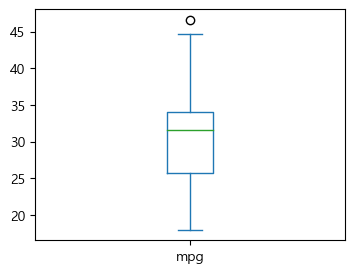

In [52]:
mask = car2['origin'] == 3 # -> masking 처리한다고 함
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))

<Axes: ylabel='count'>

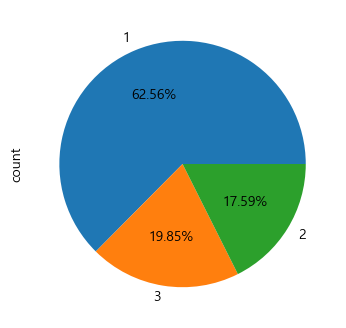

In [59]:
# box-plot 은 이상치 검출을 위해 주로 그린다.
car2['origin'].value_counts().plot(kind = 'pie',figsize=(4,4),autopct = '%.2f%%')

In [ ]:
# %f   소수점 6번째 자리
# %.2f 소수점 2번째 자리

# '{변수:f}' 소수점 6째 자리
# '{변수:.2f}' 소수점 6째 자리

rate = 89.1357
print('적중률 : %.2f'%rate)

print(f'적중률 : {rate:.2f}')

print(f'적중률 : {rate:.2f}%')

print(f'적중률 : %{rate:.2f}')
#인터넷 찾아서 공부할 것